## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [145]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [5]:
file_path = "C:/Users/ASUS-NB/Downloads/tips.csv"
df =pd.read_csv(file_path)

### 1. Make a list of categorical and numerical columns in the data.

In [11]:
columns = df.columns


categorical_columns = df.select_dtypes(include=['object']).columns

numerical_columns = df.select_dtypes(exclude=['object']).columns


Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Index(['total_bill', 'tip', 'size'], dtype='object')


### 2. Compute the average bill amount for each day.

In [13]:
average_bill_amount = df.groupby('day')['total_bill'].mean()


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [30]:
generous = df.groupby('sex')['tip'].mean()
max_tip_gender_tuple = max(generous.items(), key=lambda x: x[1])

print(max_tip_gender_tuple)

('Male', 3.0896178343949043)


### 4. According to the data, were there more customers for dinner or lunch?

In [34]:
avg_customer = df.groupby('time')['size'].count()
max_avg_customer = max(avg_customer.items(), key=lambda x: x[1])

print(max_avg_customer)

time
Dinner    176
Lunch      68
Name: size, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [36]:
#Based on the statistics it seems Males were generous as compared to Females in terms of tips
#The below output reflects the genorisity of males towards giving tips was maximum
#('Male', 3.0896178343949043)

('Male', 3.0896178343949043)


### 6. Find the busiest day in terms of the orders?

In [46]:
days_busiest = df.groupby('day')['total_bill'].mean()
busy_days = max(days_busiest.items(), key=lambda x: x[1])
print(busy_days);

('Sun', 21.41)


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

1.1262346334818638


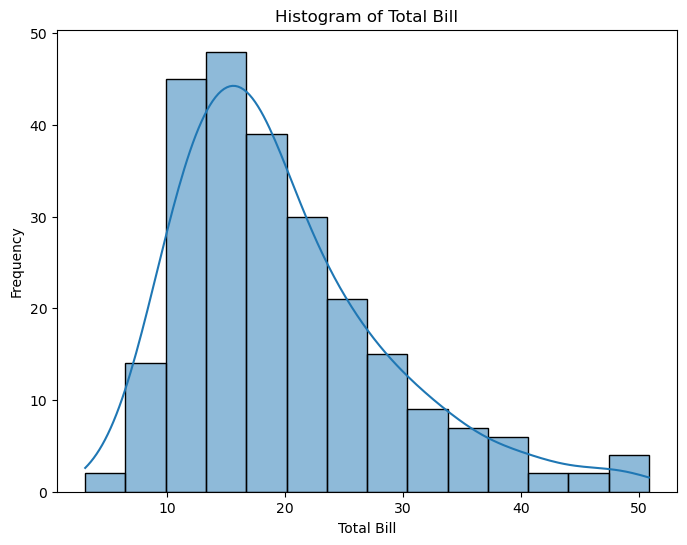

In [61]:
import seaborn as sns
from scipy.stats import skew, pearsonr
import matplotlib.pyplot as plt
skewness = skew(df['total_bill'])
print(skewness)

#if skewness is greater than zero it means it's positively skewed, here our skew values is greater than 0 
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bill'], kde=True)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

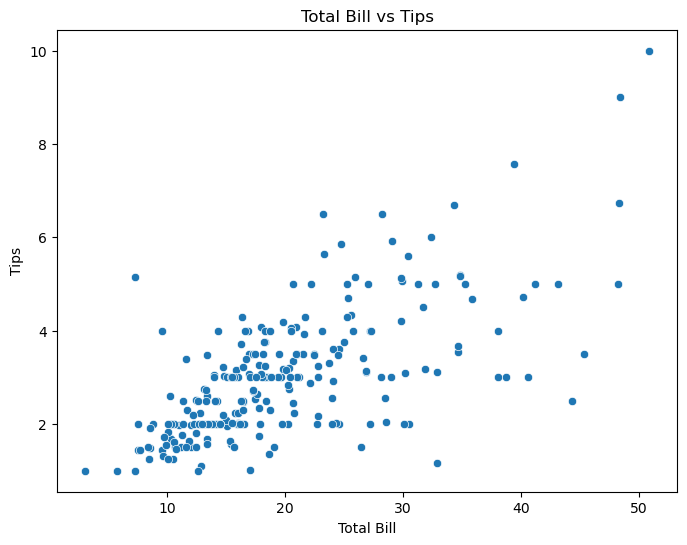

0.6757341092113645


In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.title('Total Bill vs Tips')
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.show()

correlation_coefficient, _ = pearsonr(df['total_bill'], df['tip'])
print(correlation_coefficient)

#on observing the plot we observe there is a positive linear relationship between total bill and tips as the correlation coefficient is greater than 0

### 9. What is the percentage of males and females in the dataset? and display it in the plot

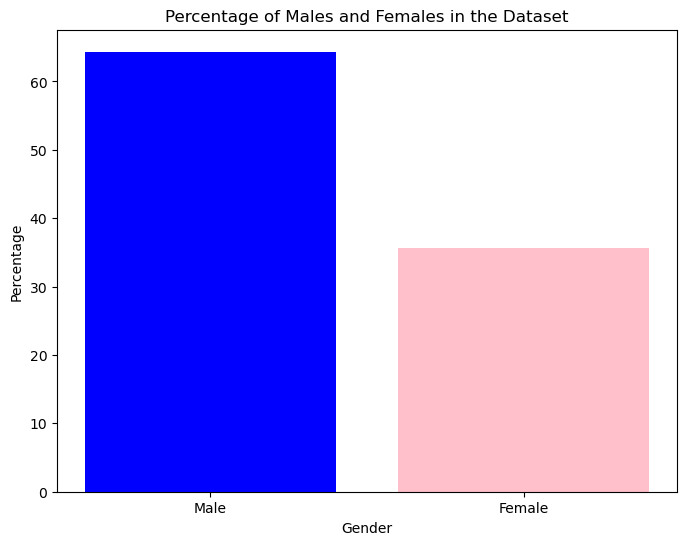

In [72]:
gender = df.groupby('sex')['sex'].count()
total = len(df)
male_count= (gender['Male']/total)*100
female_count = (gender['Female']/total)*100
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], [male_count, female_count], color=['blue', 'pink'])
plt.title('Percentage of Males and Females in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

sex     Female  Male
smoker              
No          54    97
Yes         33    60


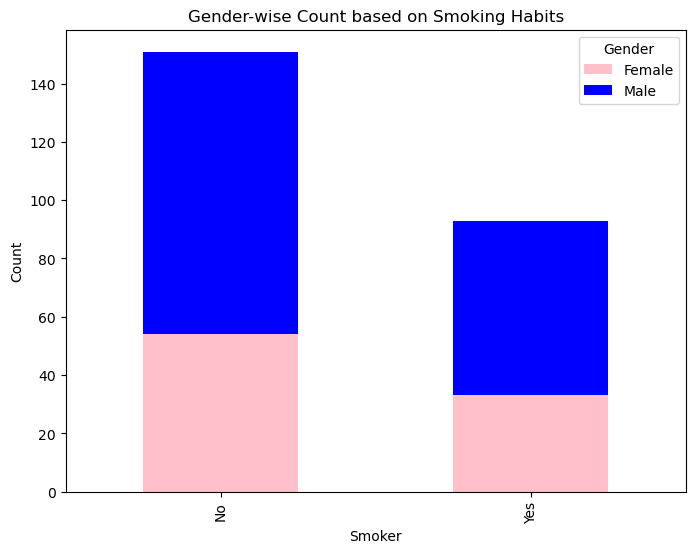

In [83]:

smoke_count = df.groupby('smoker')['sex'].value_counts().unstack()
print(smoke_count)
smoke_count.plot(kind='bar', stacked=True, color=['pink', 'blue'], figsize=(8, 6))
plt.title('Gender-wise Count based on Smoking Habits')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

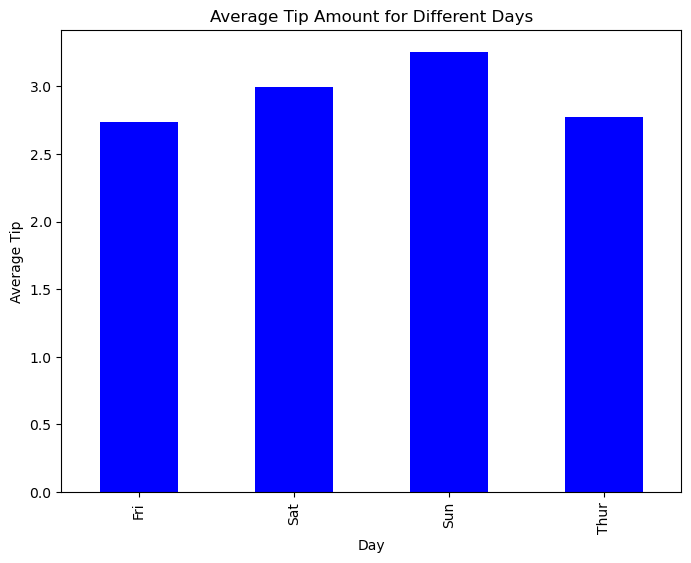

In [98]:
count_group =df.groupby('day')['tip'].mean()

count_group.plot(kind='bar',  color=[ 'blue'], figsize=(8, 6))
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip')

plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


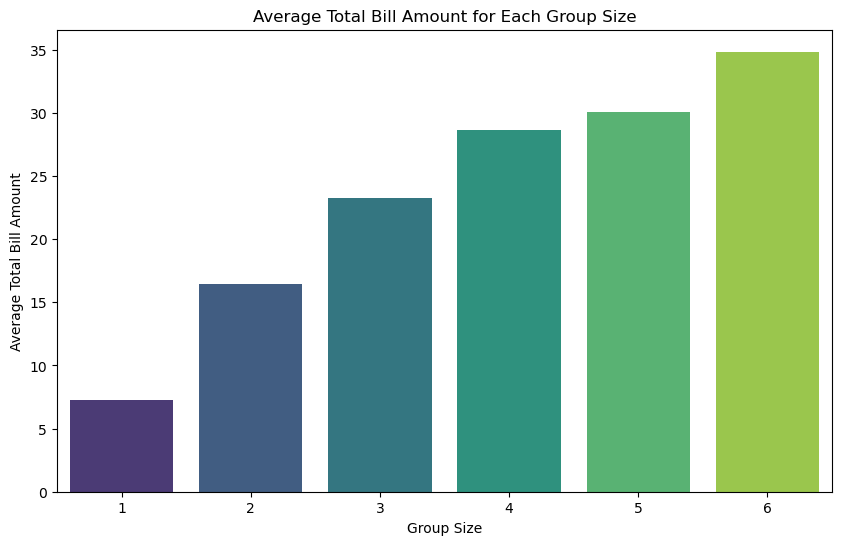

In [109]:
count_avg_size = df.groupby('size')['total_bill'].mean()
print(count_avg_size)

plt.figure(figsize=(10, 6))
sns.barplot(x=count_avg_size.index, y=count_avg_size.values, palette='viridis')
plt.title('Average Total Bill Amount for Each Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Total Bill Amount')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

sex
Female    1570.95
Male      3256.82
Name: total_bill, dtype: float64


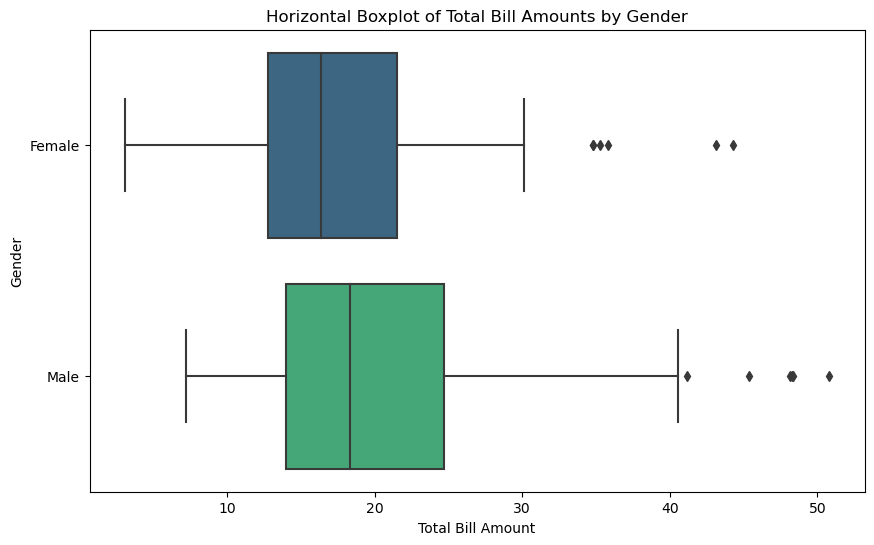

In [113]:
gender_plot = df.groupby('sex')['total_bill'].sum()
print(gender_plot)

plt.figure(figsize=(10, 6))
sns.boxplot(x='total_bill', y='sex', data=df, orient='h', palette='viridis')
plt.title('Horizontal Boxplot of Total Bill Amounts by Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [133]:

weekend_meals = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'].isin(['Lunch', 'Dinner']))]
# print(weekend_meals)
tail = weekend_meals.groupby(['day','time'])['total_bill'].max()
print(tail)

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


### 15. Compute the percentage of missing values in the dataset.

In [135]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [140]:
duplicates = df[df.duplicated()]
print(duplicates);
duplicate_count = duplicates.shape[0]
print(duplicate_count)
if duplicate_count > 0 :
    df =df.drop_duplicates()

     total_bill  tip     sex smoker   day   time  size
202        13.0  2.0  Female    Yes  Thur  Lunch     2
1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

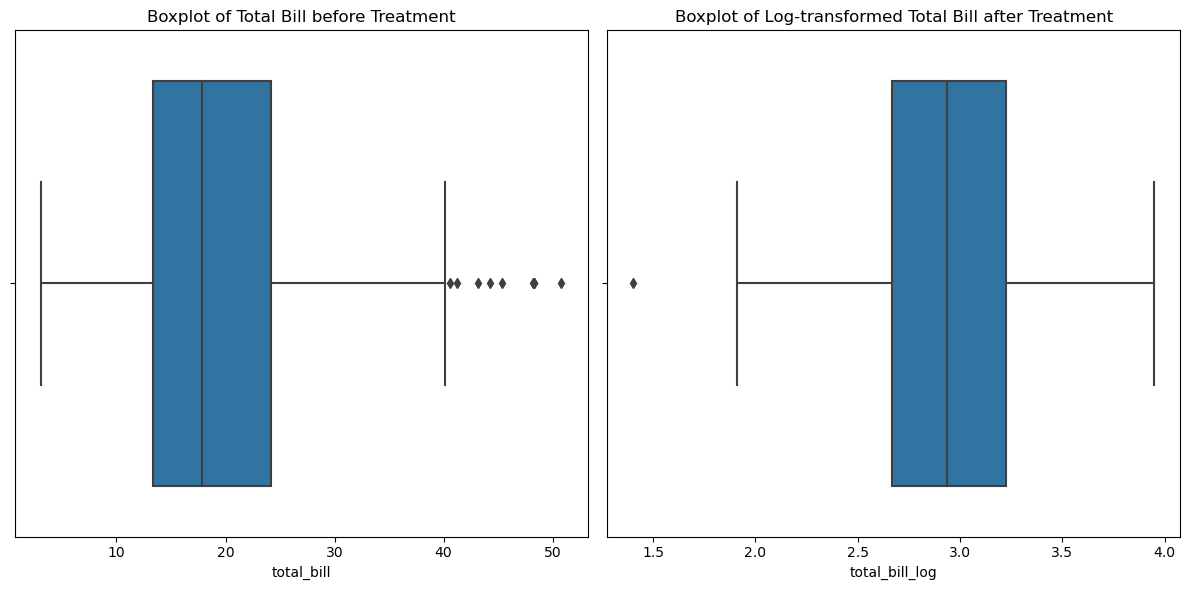

In [150]:
import numpy as np
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='total_bill', data=df)
plt.title('Boxplot of Total Bill before Treatment')

# Identify and treat outliers using log transformation
df['total_bill_log'] = np.log1p(df['total_bill'])

# Plot the boxplot after treatment
plt.subplot(1, 2, 2)
sns.boxplot(x='total_bill_log', data=df)
plt.title('Boxplot of Log-transformed Total Bill after Treatment')

plt.tight_layout()
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

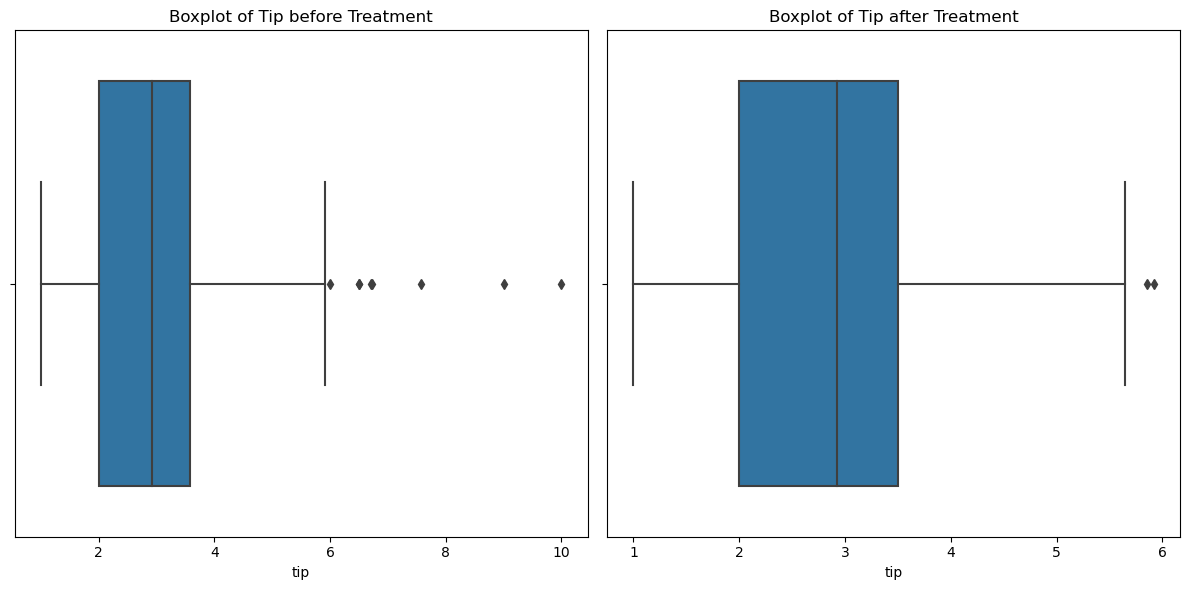

In [151]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='tip', data=df)
plt.title('Boxplot of Tip before Treatment')

# Calculate the IQR
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and treat outliers
outliers = (df['tip'] < lower_bound) | (df['tip'] > upper_bound)
df.loc[outliers, 'tip'] = df['tip'].median()

# Plot the boxplot after treatment
plt.subplot(1, 2, 2)
sns.boxplot(x='tip', data=df)
plt.title('Boxplot of Tip after Treatment')

plt.tight_layout()
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [152]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_5 = df_encoded.sample(5)
print(df_5)

     total_bill   tip  size  total_bill_log  sex_Female  sex_Male  smoker_No  \
102       44.30  2.50     3        3.813307           1         0          0   
145        8.35  1.50     2        2.235376           1         0          1   
232       11.61  3.39     2        2.534490           0         1          1   
206       26.59  3.41     3        3.317453           0         1          0   
73        25.28  5.00     2        3.268808           1         0          0   

     smoker_Yes  day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
102           1        0        1        0         0            1           0  
145           0        0        0        0         1            0           1  
232           0        0        1        0         0            1           0  
206           1        0        1        0         0            1           0  
73            1        0        1        0         0            1           0  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [153]:
total_bill_range = df['total_bill'].max() - df['total_bill'].min()

# Transform values to have a range of 1
df['total_bill_transformed'] = (df['total_bill'] - df['total_bill'].min()) / total_bill_range


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [ ]:
from sklearn.model_selection import train_test_split
file_path = "C:/Users/ASUS-NB/Downloads/tips.csv"
tips_df =pd.read_csv(file_path)
tips_df_encoded = pd.get_dummies(tips_df, columns=categorical_columns)

X = tips_df_encoded.drop('tip', axis=1)  # Features (exclude the target column 'tip')
y = tips_df_encoded['tip']  # Target column 'tip'

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [159]:
# Selecting features (X) and target variable (y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
file_path = "C:/Users/ASUS-NB/Downloads/tips.csv"
tips_df =pd.read_csv(file_path)
X = tips_df[['total_bill', 'size']]
y = tips_df['tip']

# Splitting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the columns 'total_bill' and 'size' using Min-Max scaling
scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)

### Happy Learning:)